In [127]:
import warnings
warnings.simplefilter(action='ignore')

In [128]:
import scanpy as sc
import torch
import scarches as sca
import numpy as np
import gdown

In [129]:
sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [130]:
adata = sc.read('tyser.h5ad')
#hips = sc.read("hiPSC.h5ad")

In [131]:
adata.T

AnnData object with n_obs × n_vars = 57490 × 1069
    obs: 'features'
    var: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint', 'percent.mt'

In [132]:
print(adata.X.shape)
print(adata.X[:5, :5])  # View a small slice

(1069, 57490)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 0)	2.0
  (2, 0)	2.0
  (4, 1)	1.0


In [133]:
#adata.X = adata.layers["counts"].copy()
# Use adata.X directly, as it contains raw counts.
adata.X = adata.X.copy()


In [134]:
sca.utils.add_annotations(adata, 'reactome.gmt', min_genes=12, clean=True)

In [135]:
adata._inplace_subset_var(adata.varm['I'].sum(1)>0)

In [136]:
sc.pp.normalize_total(adata)

In [137]:
sc.pp.log1p(adata)

In [138]:
print(adata.obs.keys())


Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name',
       'Characteristics.sampling.site.',
       'Characteristics.inferred.cell.type...authors.labels.',
       'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id',
       'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint',
       'percent.mt'],
      dtype='object')


In [ ]:
#adata.obs['batch'] = 'reference'
dataset_samen.

,orig.ident,nCount_RNA,nFeature_RNA,Source.Name,Characteristics.sampling.site.,Characteristics.inferred.cell.type...authors.labels.,Characteristics.inferred.cell.type...ontology.labels.,cluster_id,sub_cluster,origin,run,sample_name,timepoint,percent.mt,batch
SS.sc7786612,0,259888.990001,6942,SS.sc7786612,rostral,endodermal cell,endodermal cell,Endoderm,DE(P),tyser,tyser,tyser,tyser,1.304482,reference
SS.sc7786605,0,437911.014986,6140,SS.sc7786605,rostral,advanced mesoderm,mesoderm cell,Advanced Mesoderm,Advanced Mesoderm,tyser,tyser,tyser,tyser,1.295160,reference
SS.sc7785737,0,322351.983054,3800,SS.sc7785737,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.294179,reference
SS.sc7785398,0,394318.996000,2964,SS.sc7785398,yolk sac,yolk sac mesoderm,mesenchyme of yolk sac,ExE Mesoderm,YS Mesoderm,tyser,tyser,tyser,tyser,1.423720,reference
SS.sc7788091,0,298217.993000,5030,SS.sc7788091,caudal,axial mesoderm,chordamesodermal cell,Axial Mesoderm,Axial Mesoderm,tyser,tyser,tyser,tyser,1.327328,reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS.sc7785965,0,226569.027995,6361,SS.sc7785965,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,tyser,tyser,1.675409,reference
SS.sc7788259,0,353921.980998,4647,SS.sc7788259,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.615045,reference
SS.sc7786123,0,366998.009999,2822,SS.sc7786123,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.602395,reference
SS.sc7786212,0,459601.642974,6110,SS.sc7786212,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,tyser,tyser,1.150624,reference


In [140]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    batch_key="batch",
    subset=True)

In [141]:
select_terms = adata.varm['I'].sum(0) > 12
adata.uns['terms'] = np.array(adata.uns['terms'])[select_terms].tolist()
adata.varm['I'] = adata.varm['I'][:, select_terms]

In [142]:
adata._inplace_subset_var(adata.varm['I'].sum(1) > 0)

In [143]:
adata.X = adata.X.copy()

In [274]:
intr_cvae = sca.models.EXPIMAP(
    adata=adata,
    condition_key='batch',
    hidden_layer_sizes=[256, 256, 256],
    recon_loss='nb'
)


INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1841 256 1
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 224
Decoder Architecture:
	Masked linear layer in, ext_m, ext, cond, out:  224 0 0 1 1841
	with hard mask.
Last Decoder layer: softmax


In [275]:
ALPHA = 0.7

In [276]:
adata.X = adata.X.astype(np.float32)

In [277]:
early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss", # val_unweighted_loss
    "threshold": 0,
    "patience": 50,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}
intr_cvae.train(
    n_epochs=400,
    alpha_epoch_anneal=100,
    alpha=ALPHA,
    alpha_kl=0.5,
    weight_decay=0.,
    early_stopping_kwargs=early_stopping_kwargs,
    use_early_stopping=True,
    monitor_only_val=False,
    seed=2020,
)

Preparing (1069, 1841)
Instantiating dataset
Init the group lasso proximal operator for the main terms.
 |████████████████████| 100.0%  - epoch_loss: 1308.1874084473 - epoch_recon_loss: 1276.7711639404 - epoch_kl_loss: 62.8324499130 - val_loss: 1316.1992187500 - val_recon_loss: 1284.4739990234 - val_kl_loss: 63.450359344531
Saving best state of network...
Best State was in Epoch 398


In [278]:
MEAN = False

In [279]:
adata.obsm['X_cvae'] = intr_cvae.get_latent(mean=MEAN, only_active=True)

In [280]:
sc.pp.neighbors(adata, use_rep='X_cvae')

In [281]:
sc.tl.umap(adata)

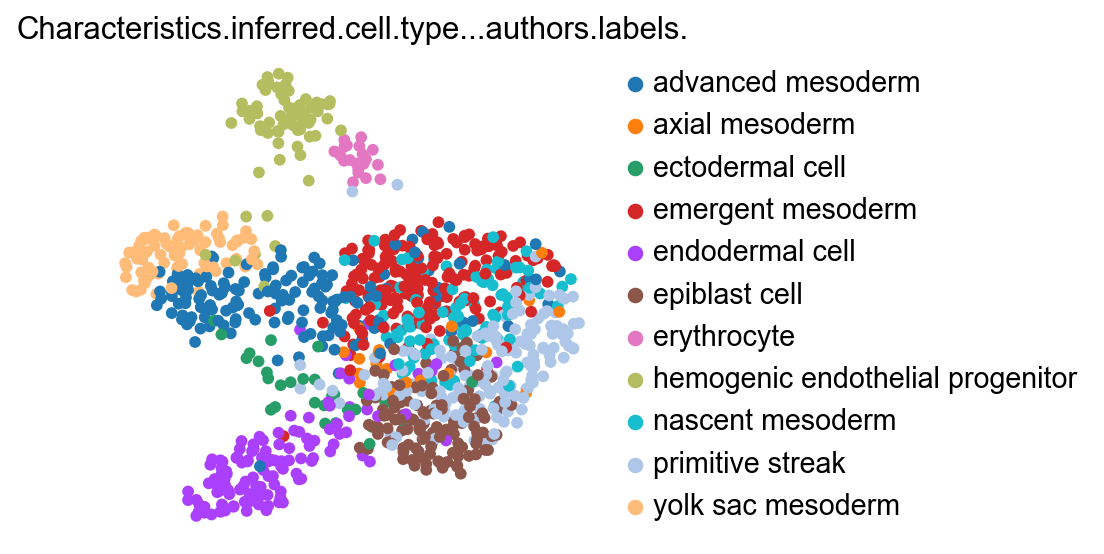

In [282]:
sc.pl.umap(adata, color=['Characteristics.inferred.cell.type...authors.labels.'], frameon=False)

In [283]:
# Lees de query-dataset
hips = sc.read('hiPSC.h5ad')

# Controleer de overlap van genen
missing_genes = [gene for gene in adata.var_names if gene not in hips.var_names]
print(f"Aantal genen in hips die niet in tyser staan: {len(missing_genes)}")
print("Ontbrekende genen:", missing_genes)

KeyboardInterrupt: 

In [ ]:
# Filter genen die aanwezig zijn in beide datasets
common_genes = [gene for gene in adata.var_names if gene in hips.var_names]

# Pas de filtering toe op beide datasets
hips = hips[:, common_genes].copy()
adata = adata[:, common_genes].copy()

In [ ]:
hips = sc.read('hiPSC.h5ad')

commom = adata.var_names.intersection(hips.var_names)
hips = hips[:, commom].copy()

hips


AnnData object with n_obs × n_vars = 4694 × 1841
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'run', 'sample_name', 'percent.mt', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_mnn', 'X_umap'
    obsp: 'distances'

In [284]:
intr_cvae.adata

AnnData object with n_obs × n_vars = 1069 × 1841
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint', 'percent.mt', 'batch'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'terms', 'log1p', 'hvg', 'neighbors', 'umap', 'Characteristics.inferred.cell.type...authors.labels._colors'
    obsm: 'X_cvae', 'X_umap'
    varm: 'I'
    obsp: 'distances', 'connectivities'

In [ ]:
#hips = sc.read('hiPSC.h5ad')[:, adata.var_names].copy()

In [ ]:
# Controleer of var_names overeenkomen
#print("Aantal genen in beide datasets na filtering:", len(common_genes))
#print("Zijn genen nu identiek?", np.array_equal(hips.var_names, hips.var_names))

In [285]:
hips.obs['batch'] = 'query'

In [ ]:
dataset_samen.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 2205588 stored elements and shape (5763, 1841)>

In [288]:
hips.X = hips.X.astype(np.float32)


In [286]:
q_intr_cvae = sca.models.EXPIMAP.load_query_data(hips, intr_cvae)

AnnData object with n_obs × n_vars = 4694 × 1841
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'run', 'sample_name', 'percent.mt', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22', 'batch'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_mnn', 'X_umap'
    obsp: 'distances'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1841 256 2
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 224
Decoder Architecture:
	Masked linear layer in, ext_m, ext, cond, out:  224 0 0 2 1841
	with hard mask.
Last Decoder layer: softmax


In [289]:
q_intr_cvae.train(n_epochs=400, alpha_epoch_anneal=100, weight_decay=0., alpha_kl=0.1, seed=2020, use_early_stopping=True)


Preparing (4694, 1841)
Instantiating dataset
 |███████████---------| 59.8%  - val_loss: 1130.1795043945 - val_recon_loss: 1125.0456848145 - val_kl_loss: 51.3380908966
ADJUSTED LR
 |████████████--------| 61.5%  - val_loss: 1128.3386535645 - val_recon_loss: 1123.2088623047 - val_kl_loss: 51.2980089188
Stopping early: no improvement of more than 0 nats in 20 epochs
If the early stopping criterion is too strong, please instantiate it with different parameters in the train method.
Saving best state of network...
Best State was in Epoch 245


In [290]:
dataset_samen = sc.AnnData.concatenate(adata, hips, batch_key='batch_join', uns_merge='same')

In [291]:
dataset_samen

AnnData object with n_obs × n_vars = 5763 × 1841
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint', 'percent.mt', 'batch', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22', 'batch_join'
    var: 'features', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0'
    obsm: 'X_umap'

In [292]:
dataset_samen.X = dataset_samen.X.astype(np.float32)
#adata.X = adata.X.astype(np.float32)

In [293]:
dataset_samen.obs.batch

SS.sc7786612-0                              reference
SS.sc7786605-0                              reference
SS.sc7785737-0                              reference
SS.sc7785398-0                              reference
SS.sc7788091-0                              reference
                                              ...    
batch_1_sample_120H_TTTACTGCATCCGCGA-1-1        query
batch_1_sample_120H_TTTCACATCAGCCCAG-1-1        query
batch_1_sample_120H_TTTCAGTAGTACAGAT-1-1        query
batch_1_sample_120H_TTTGATCAGCTCCATA-1-1        query
batch_1_sample_120H_TTTGTTGAGTTGGCGA-1-1        query
Name: batch, Length: 5763, dtype: object

In [294]:
dataset_samen.X.shape

(5763, 1841)

In [295]:
#print("X shape:", dataset_samen.X.shape)  # Should output something like (512, 1841)
#print("batch shape:", dataset_samen.obs['batch'].shape)  # Should output the shape of the batch column
#dataset_samen.obs['batch']
# 
dataset_samen.obs['batch'].value_counts()

query        4694
reference    1069
Name: batch, dtype: int64

In [296]:
q_intr_cvae

In [297]:
dataset_samen.obsm['X_cvae'] = q_intr_cvae.get_latent(dataset_samen.X, dataset_samen.obs['batch'], mean=MEAN, only_active=True)

In [298]:
sc.pp.neighbors(dataset_samen, use_rep='X_cvae')

In [300]:
sc.tl.umap(dataset_samen)


In [302]:
dataset_samen

AnnData object with n_obs × n_vars = 5763 × 1841
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint', 'percent.mt', 'batch', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22', 'batch_join'
    var: 'features', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0'
    uns: 'neighbors', 'umap'
    obsm: 'X_umap', 'X_cvae'
    obsp: 'distances', 'connectivities'

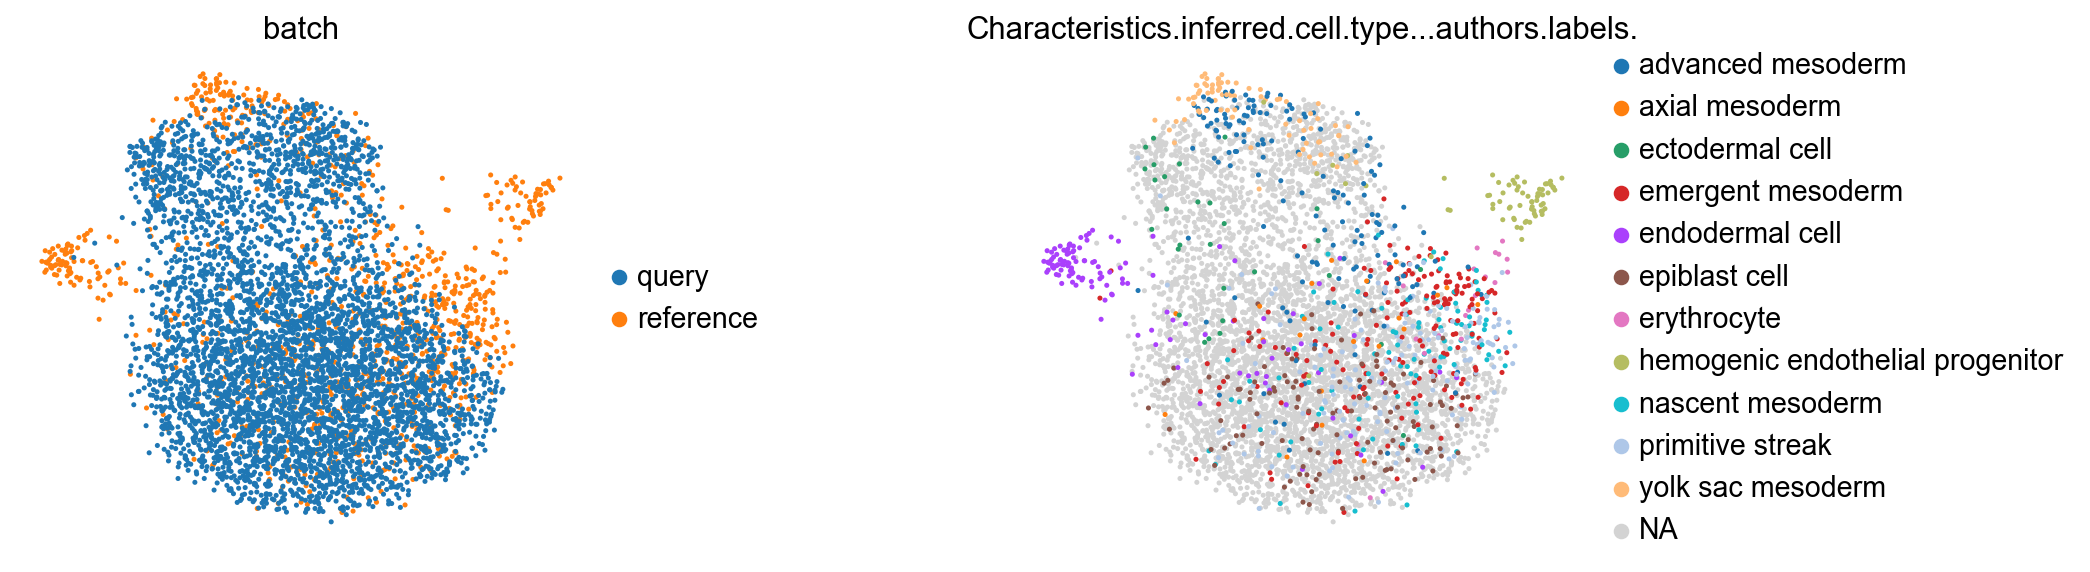

In [ ]:
sc.pl.umap(dataset_samen, color=['batch'], frameon=False, wspace=0.6)


In [ ]:
sc.pl.umap(dataset_samen, color=['Characteristics.inferred.cell.type...authors.labels.'], frameon=False, wspace=0.6)
